In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx.algorithms.community as nxcom

In [40]:
def quantify_graph(graph):
    number_of_nodes = graph.number_of_nodes()
    print("The graph has {} nodes and {} edges".format(number_of_nodes, number_of_edges))
    
    print("graph exploration")
    print(nx.is_weighted(graph))

In [ ]:
def visualize_graph(graph):
    

In [ ]:
def load_graph(graph_name):
    

In [4]:
facebook_graph = nx.read_gml("data/graph_facebook.gml")

In [38]:
quantify_graph(facebook_graph)

The graph has 4039 nodes
graph exploration
False


In [5]:
facebook_graph.number_of_nodes()

4039

In [6]:
facebook_graph.number_of_edges()

88234

In [19]:
def plot_degree_distribution(deg, xscale='linear', yscale='linear', bins=20, density=True):
    fig, ax = plt.subplots()
    title = "Degree Distribution "

    if xscale == 'log':
        title+="Log"
        binlog = np.logspace(np.log10(min(deg)),np.log10(max(deg)), bins)
        plt.hist(deg, binlog, density = density, alpha=0.5)
        plt.xlabel('log k')
    else:
        title+="Lin"
        plt.hist(deg, bins = bins, density = density, alpha=0.5)
        plt.xlabel('k')
        
    if yscale == 'log':
        plt.ylabel("log P(k)")
        title+="-Log Scale"
    else:
        plt.ylabel("P(k)")
        title+="-Lin Scale"
    
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.title(title)
    plt.show() 

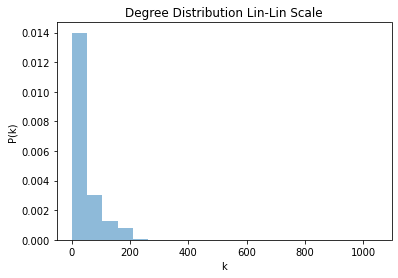

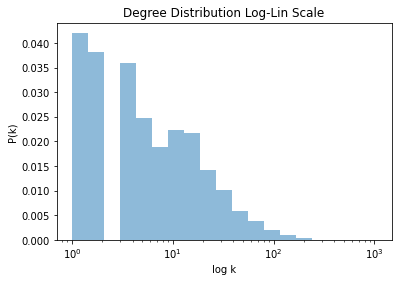

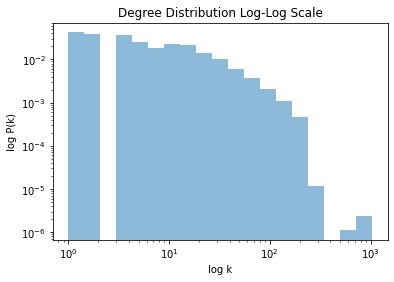

In [25]:
# Facebook Friendship Graph
facebook_graph_degrees = facebook_graph.degree()
facebook_graph_degrees = [facebook_graph_degrees[i] for i in facebook_graph.nodes()]
plot_degree_distribution(facebook_graph_degrees, xscale='linear', yscale='linear')
plot_degree_distribution(facebook_graph_degrees, xscale='log', yscale='linear')
plot_degree_distribution(facebook_graph_degrees, xscale='log', yscale='log')

In [26]:
def draw_communities(gr, greedy=True, node_size=100, gr_name='', randomized=False):
  if greedy:
    coms = nxcom.greedy_modularity_communities(gr)
  else:
    coms = list(nxcom.label_propagation_communities(gr))
    
  color_dict = {}
  for com in coms:
    color = tuple([random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)])
    for item in com:
      color_dict[item] = color
  colors = []
  for node in gr.nodes():
    colors.append(color_dict[node])

  plt.title(f"{'Randomized' if randomized else ''} {gr_name} Network: {len(coms)} {'greedy modular' if greedy else 'label propagation'} communities")
  nx.draw(gr, pos=nx.spring_layout(gr), node_color=colors, node_size=node_size)
  plt.show()

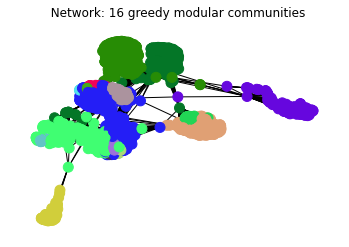

In [31]:
draw_communities(facebook_graph)

In [ ]:
draw_communities(facebook_graph)